In [8]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import wilcoxon
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu

# Часть1: небольшие задачи

Предполагается, что для решения заданий № 1-3 будут использоваться разные тесты.

<div class="alert alert-info">
<b>Задание № 1 (Обязательно)</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [2]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# выборки независимые
# Н0: различий в эффекте нет
t, p = stats.ttest_ind(A, B)
print(f't-statistic = {t}\np-value = {p}')
print()

if p <= 0.05:
    print('Препараты действуют по-разному, принимаем альтернативную гипотезу.')
else:
    print('Препараты действуют одинаково, не отвергаем нулевую гипотезу.')

t-statistic = -1.733800647210997
p-value = 0.08451003973499756

Препараты действуют одинаково, не отвергаем нулевую гипотезу.


<AxesSubplot:ylabel='Count'>

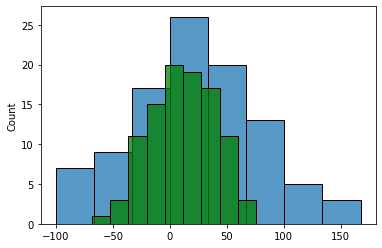

In [8]:
# визуализация данных
sns.histplot(B)
sns.histplot(A, color='green')

Визуально распределения данных похожи, средние близки.

<div class="alert alert-info">
<b>Задание № 2 (Обязательно)</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [19]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# выборки зависимые - это одна и та же группа людей
# используем критерий Вилкоксона
# Н0: эффект отсутствует
stat_w, p_w = wilcoxon(A, B)
print(f'statistic = {stat_w}\np-value = {p_w}')
print()

if p_w <= 0.05:
    print('Наличие эффекта имеет статистические предпосылки, принимаем альтернативную гипотезу.')
else:
    print('Эффект отсутствует, не отвергаем нулевую гипотезу.')

statistic = 1930.0
p-value = 0.04077572901549266

Наличие эффекта имеет статистические предпосылки, принимаем альтернативную гипотезу.


<AxesSubplot:ylabel='Count'>

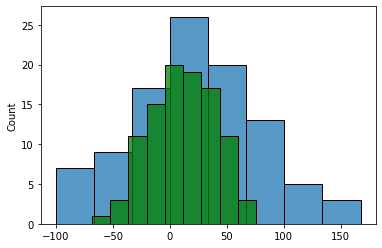

In [14]:
# визуализация данных
sns.histplot(B)
sns.histplot(A, color='green')

<div class="alert alert-info">
<b>Задание № 3 (Обязательно)</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

In [3]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

# дисперсионный анализ для 3х выборок
f, p_f = f_oneway(water, nutri, mineral)
print(f'F-statistic = {f}\np-value = {p_f}')
print()

if p_f <= 0.05:
    print('Есть различия в эффекте, принимаем альтернативную гипотезу.')
else:
    print('Нет различий при воздействии различных удобрений, не отвергаем нулевую гипотезу.')

F-statistic = 12.525963044834192
p-value = 2.9240047906326866e-05

Есть различия в эффекте, принимаем альтернативную гипотезу.


In [5]:
# Есть ли эффект от удобрения по сравнению с минералкой?
# Н0: эффект отсутствует
f2, p2 = f_oneway(nutri, mineral)
print(f'F-statistic = {f2}\np-value = {p2}')
print()

if p2 <= 0.05:
    print('Есть различия в эффекте, принимаем альтернативную гипотезу.')
else:
    print('Нет различий при воздействии различных удобрений, не отвергаем нулевую гипотезу.')

F-statistic = 18.128724672228838
p-value = 0.0001213673340124552

Есть различия в эффекте, принимаем альтернативную гипотезу.


   value method
0      1  water
1      2  water
2      3  water
3      4  water
4      2  water


<AxesSubplot:xlabel='method', ylabel='value'>

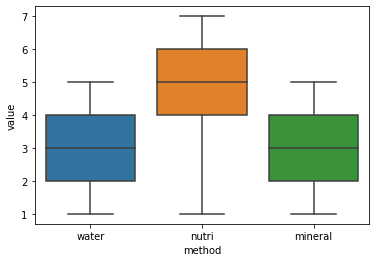

In [14]:
# визуализация данных
pouring = pd.DataFrame()
pouring['value'] = water + nutri + mineral
pouring['method'] = ['water']*len(water) + ['nutri']*len(nutri) + ['mineral']*len(mineral)
print(pouring.head())

sns.boxplot(x='method', y='value', data=pouring)

На графике видно, что разницы между использованием воды и минералки нет. Изменение эффекта в лучшую сторону есть, если применять удобрение.

# Часть 2: Cookie Cats

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. 
    
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
    
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
    
Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрывший вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрывший вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.
    
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычном `matplotlib`
</div>

In [28]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [29]:
data.groupby('version').agg({'sum_gamerounds': 'sum', 'userid': 'count'})

,sum_gamerounds,userid
version,,
gate_30,2344795,44700
gate_40,2333530,45489


Суммарное количество игр в контрольной и тестовой группе отличаются незначительно (в контрольной на на 0,48% больше = 2344795 / 2333530). Размеры выборок немного отличаются (в тестовой на 1,8% больше = 45489 / 44700).

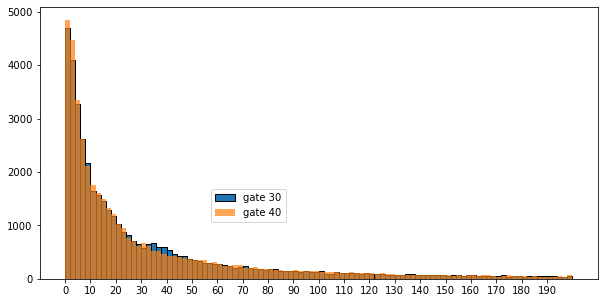

In [34]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)

bins = 100
plt.figure(figsize=(10, 5))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.xticks(range(0, 200, 10))
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

Распределение количества игроков, исходя из количества раундов, пройденых в первую неделю, отлично от нормального. Визуально различия не кажутся значительными. Наиболее заметные:
 - до 10 игр,
 - в районе 30-40 игр.

Используем статистические тесты для более подробного изучения данных.

In [31]:
# выборки независимые, распределение не является нормальным, используем критерий Манна-Уитни
# Н0: разница между контрольной и тестовой группой отсутствует
x = data[data.version=='gate_30']['sum_gamerounds']
y = data[data.version=='gate_40']['sum_gamerounds']

stat, p_mw = mannwhitneyu(x, y)
print('Mann-Whitney p-value = {:.3f}'.format(p_mw))

if p_mw <= 0.05:
    print('Между контрольной и тестовой группой есть различия, принимаем альтернативную гипотезу.')
else:
    print('Между контрольной и тестовой группой нет различий, не отвергаем нулевую гипотезу.')

Mann-Whitney p-value = 0.025
Между контрольной и тестовой группой есть различия, принимаем альтернативную гипотезу.


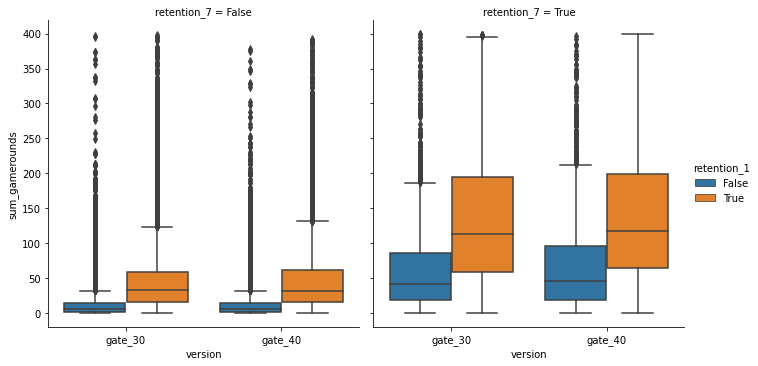

In [33]:
df = data.loc[data['sum_gamerounds'] < 400].copy()

sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95)

In [55]:
# рассчитаем, какова доля игроков, вернувшихся к игре через 1 день после установки игры
ret_1_30 = data[(data['version']=='gate_30') & (data['retention_1']==True)]['retention_1'].count()
total_30 = data[(data['version']=='gate_30')]['retention_1'].count()
print(f'gate_30 1 day retention rate: {round(100 * ret_1_30 / total_30, 2)}%')

ret_1_40 = data[(data['version']=='gate_40') & (data['retention_1']==True)]['retention_1'].count()
total_40 = data[(data['version']=='gate_40')]['retention_1'].count()
print(f'gate_40 1 day retention rate: {round(100 * ret_1_40 / total_40, 2)}%')

gate_30 1 day retention rate: 44.82%
gate_40 1 day retention rate: 44.23%


In [57]:
# рассчитаем, какова доля игроков, вернувшихся к игре через 7 дней после установки игры
ret_7_30 = data[(data['version']=='gate_30') & (data['retention_7']==True)]['retention_7'].count()
print(f'gate_30 7 day retention rate: {round(100 * ret_7_30 / total_30, 2)}%')

ret_7_40 = data[(data['version']=='gate_40') & (data['retention_7']==True)]['retention_7'].count()
print(f'gate_40 7 day retention rate: {round(100 * ret_7_40 / total_40, 2)}%')

gate_30 7 day retention rate: 19.02%
gate_40 7 day retention rate: 18.2%


Количество игроков, вернувшихся к игре через 1 день, при воротах на 30 больше (44.82%), чем при воротах на 40 (44.23%). Аналогично, через 7 дней вернулись к игре большее количество игравших при воротах на 30 (19.02%), чем при воротах на 40 (18.2%).
Учитывая результаты статистичего анализа, получаем, что различия между контрольной и тестовой группой могут быть истолкованы в пользу того, чтобы оставить все как есть, т.е. не премещать ворота на 40.

# Часть 3: Покемоны

<div class="alert alert-info">
Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

#### Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона
    
Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается, что они имеют одинаковую значимость.
</div>

In [9]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)
pokemon

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


In [54]:
# изучим датасет на предмет пропусков
pokemon.isna().any()

# видим, что пропуски есть в столбцах Name и Class 2. Отсутствие значений в Class 2 не вызывает вопросов, т.к. класс может быть 1.

pid          False
Name          True
Class 1      False
Class 2       True
HP           False
Attack       False
Defense      False
Sp. Atk      False
Sp. Def      False
Speed        False
Legendary    False
dtype: bool

In [53]:
# отдельно рассмотрим пропуски в столбце Name
pokemon[pokemon['Name'].isnull()]

# видим, что строка не пустая, имеет id и другие данные
# заменять или удалять не будем

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,False


<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [104]:
# функция, выделяющая нужные нам классы
def grass_rock_function(row):
    if (row['Class 1']=='Grass') | (row['Class 2']=='Grass') & (row['Class 1']!='Rock') & (row['Class 2']!='Rock'):
        return 'Grass'
    elif (row['Class 1']=='Rock') | (row['Class 2']=='Rock') & (row['Class 1']!='Grass') & (row['Class 2']!='Grass'):
        return 'Rock'

# создадим копию, чтобы не изменять исходный датафрейм, и применим функцию
poke = pokemon.copy()
poke['Class'] = poke.apply(grass_rock_function, axis=1)

# оставим только нужные для задачи столбцы и строки
grass_rock = poke.loc[(poke['Class']=='Grass') | (poke['Class']=='Rock'), ['Attack', 'Class']]
grass_rock

,Attack,Class
0,49,Grass
1,62,Grass
2,82,Grass
3,100,Grass
48,50,Grass
...,...,...
785,85,Grass
786,95,Grass
787,100,Grass
795,100,Rock


In [107]:
# будем считать, что выборки независимы, имеют нормальное распределение
# применим t-критерий
# Н0: силы обычной атаки для grass и rock совпадают
t_gr, p_gr = stats.ttest_ind(grass_rock[grass_rock['Class']=='Grass']['Attack'], grass_rock[grass_rock['Class']=='Rock']['Attack'])
print("Student's p-value = {:.5f}".format(p_gr))

if p_gr <= 0.05:
    print('Классы Grass и Rock действительно имеют различную силу обычной атаки, отвергаем Н0.')
else:
    print('Похоже, что силы обычных атак совпадают, не отвергаем Н0.')

Student's p-value = 0.00055
Классы Grass и Rock действительно имеют различную силу обычной атаки, отвергаем Н0.


<AxesSubplot:xlabel='Class', ylabel='Attack'>

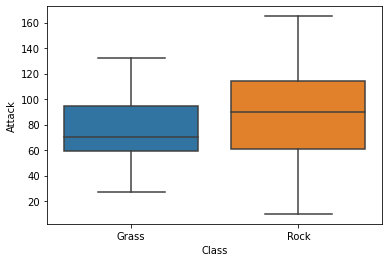

In [108]:
# визуализация
sns.boxplot(x='Class', y='Attack', data=grass_rock)

На графике видно, что выводы профессора не совсем верны. Покемоны Grass и Rock действительно имеют разную силу аттаки. Однако, более сильными являются покемоны класса Rock, медианное значение силы их обычной аттаки выше аналогичного показателя для класса Grass.

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [110]:
# функция, выделяющая нужные нам классы
def water_normal_function(row):
    if (row['Class 1']=='Water') | (row['Class 2']=='Water') & (row['Class 1']!='Normal') & (row['Class 2']!='Normal'):
        return 'Water'
    elif (row['Class 1']=='Normal') | (row['Class 2']=='Normal') & (row['Class 1']!='Water') & (row['Class 2']!='Water'):
        return 'Normal'

# создадим копию, чтобы не изменять исходный датафрейм, и применим функцию
poke_2 = pokemon.copy()
poke_2['Class'] = poke_2.apply(water_normal_function, axis=1)

# оставим только нужные для задачи столбцы и строки
water_normal = poke_2.loc[(poke_2['Class']=='Water') | (poke_2['Class']=='Normal'), ['Speed', 'Class']]
water_normal

,Speed,Class
9,43,Water
10,58,Water
11,78,Water
12,78,Water
20,56,Normal
...,...,...
762,44,Water
763,59,Water
764,70,Normal
765,109,Normal


In [116]:
# будем считать, что выборки независимы, имеют нормальное распределение
# применим t-критерий
# Н0: скорости для классов water и normal совпадают
t_wn, p_wn = stats.ttest_ind(water_normal[water_normal['Class']=='Water']['Speed'], water_normal[water_normal['Class']=='Normal']['Speed'])
print("Student's p-value = {:.5f}".format(p_wn))

if p_wn <= 0.05:
    print('Классы Water и Normal действительно имеют различную скорость, отвергаем Н0.')
else:
    print('Похоже, что скорости классов Water и Normal совпадают, не отвергаем Н0.')

Student's p-value = 0.03199
Классы Water и Normal действительно имеют различную скорость, отвергаем Н0.


<AxesSubplot:xlabel='Class', ylabel='Speed'>

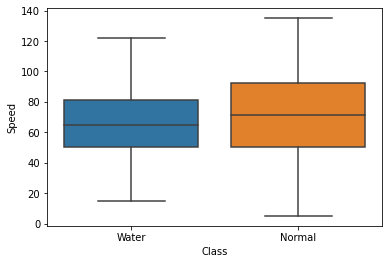

In [118]:
# визуализация
sns.boxplot(x='Class', y='Speed', data=water_normal)

Покемоны класса Water в среднем имеют более низкую скорость по сравнению с классом Normal. Профессор снова ошибся.

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [3]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [57]:
# функция, выделяющая нужные названия покемонов
def treated_function(row):
    for name in treathed_pokemon:
        if name == row:
            return 'treated'
    return 'not_treated'
    
# создадим копию, чтобы не изменять исходный датафрейм, и применим функцию
poke_3 = pokemon.copy()
poke_3['Injection'] = poke_3['Name'].apply(treated_function)

# оставим только нужные для задачи столбцы и строки
treated = poke_3.loc[:, ['Speed', 'Injection']]
treated

,Speed,Injection
0,45,not_treated
1,60,not_treated
2,80,not_treated
3,80,not_treated
4,65,not_treated
...,...,...
795,50,not_treated
796,110,not_treated
797,70,not_treated
798,80,not_treated


In [61]:
# будем считать, что выборки независимы, имеют нормальное распределение
# применим t-критерий
# Н0: сыворотка не эффективна
t_t, p_t = stats.ttest_ind(treated[treated['Injection']=='not_treated']['Speed'], treated[treated['Injection']=='treated']['Speed'])
print("Student's p-value = {:.7f}".format(p_t))

if p_t <= 0.05:
    print('Сыворотка эффективна, отвергаем Н0.')
else:
    print('Сыворотка не эффективна, не отвергаем Н0.')

Student's p-value = 0.0000001
Сыворотка эффективна, отвергаем Н0.


<AxesSubplot:xlabel='Injection', ylabel='Speed'>

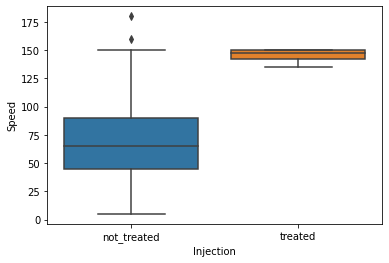

In [62]:
# визуализация
sns.boxplot(x='Injection', y='Speed', data=treated)

Статистика и визуализация показывает, что выбранные 4 типа покемонов имеют значительно более высокий показатель скорости.
Однако, сложно утверждать является ли это результатом сыворотки или изначально были выбраны более быстрые покемоны. Эффективность сыворотки вероятно лучшего всего можно было бы оценить "до" и "после" на той же самой выборке.

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [65]:
# функция, рассчитывающая сумму HP, Attack, Defense, для всех покемонов
def sum_func(row):
    return (row['HP'] + row['Attack'] + row['Defense'])

def multi_func(row):
    return row['HP'] * row['Attack'] * row['Defense']

# создадим копию, чтобы не изменять исходный датафрейм, и применим функцию
poke_4 = pokemon.copy()
poke_4['Sum'] = poke_4.apply(sum_func, axis=1)
poke_4['Multiplication'] = poke_4.apply(multi_func, axis=1)

# оставим только нужные для задачи столбцы и строки
legendary = poke_4.loc[:, ['Legendary', 'Sum', 'Multiplication']]
legendary

,Legendary,Sum,Multiplication
0,False,143,108045
1,False,185,234360
2,False,245,544480
3,False,303,984000
4,False,134,87204
...,...,...,...
795,True,300,750000
796,True,320,880000
797,True,250,528000
798,True,300,768000


In [94]:
# выборки независимы, имеют нормальное распределение
# применим t-критерий
# Н0: разница в суммарных качествах (HP, Attack, Defense) между легендарными пакемонами и обычными отсутствует
t_ls, p_ls = stats.ttest_ind(legendary[legendary['Legendary']==False]['Sum'], legendary[legendary['Legendary']==True]['Sum'])
print("Student's p-value (sum) = {:.29f}".format(p_ls))

if p_ls <= 0.05:
    print('Легендарные и обычные покемоны отличаются, отвергаем Н0.')
else:
    print('Легендарные и обычные покемоны не отличаются, не отвергаем Н0.')
    
print()

# Н0: разница в произведении качеств (HP, Attack, Defense) между легендарными пакемонами и обычными отсутствует
t_lm, p_lm = stats.ttest_ind(legendary[legendary['Legendary']==False]['Multiplication'], legendary[legendary['Legendary']==True]['Multiplication'])
print("Student's p-value (multiplication) = {:.36f}".format(p_lm))

if p_lm <= 0.05:
    print('Легендарные и обычные покемоны отличаются, отвергаем Н0.')
else:
    print('Легендарные и обычные покемоны не отличаются, не отвергаем Н0.')

Student's p-value (sum) = 0.00000000000000000000000000008
Легендарные и обычные покемоны отличаются, отвергаем Н0.

Student's p-value (multiplication) = 0.000000000000000000000000000000000002
Легендарные и обычные покемоны отличаются, отвергаем Н0.


<AxesSubplot:xlabel='Legendary', ylabel='Sum'>

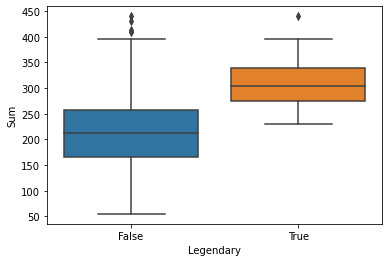

In [88]:
# визуализация
sns.boxplot(x='Legendary', y='Sum', data=legendary)

Суммарные показатели (также как и их произведения) легендарных покемонов действительно превосходят обычных. Профессор прав.

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [10]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']

In [19]:
# функция, выделяющая нужные классы
def best_defence_func(row):
    for class_ in best_defence_class:
        if (row['Class 1']==class_) | (row['Class 2']==class_):
            return class_

# создадим копию, чтобы не изменять исходный датафрейм, и применим функцию
poke_5 = pokemon.copy()
poke_5['Best defense'] = poke_5.apply(best_defence_func, axis=1)

# оставим только классы из выборки и нужные столбцы
best_defense = poke_5.loc[poke_5['Best defense'].notna(), ['Class 1', 'Class 2', 'Defense', 'Best defense']]
best_defense

,Class 1,Class 2,Defense,Best defense
32,Ground,NaN,85,Ground
33,Ground,NaN,110,Ground
36,Poison,Ground,87,Ground
39,Poison,Ground,77,Ground
55,Ground,NaN,25,Ground
...,...,...,...,...
788,Ice,NaN,85,Ice
789,Ice,NaN,184,Ice
794,Dragon,Ground,121,Ground
795,Rock,Fairy,150,Rock


Проверим, есть ли в таблице best_defense строки, где класс 1 и класс 2 содержат классы из выборки. И если есть, удалим.

In [15]:
# сделаем таблицу из пар комбинаций best_defence_class
# для этого преобразуем списки в таблицу и соединим их по принципу декартова произведения
# (на пары из поторяющихся классов не будем обращать внимания, они никак нам не помещают)
a = pd.DataFrame()
a['Class 1'] = best_defence_class
a['intersec'] = True

b = pd.DataFrame()
b['Class 2'] = best_defence_class
b['intersec'] = True

intersec = a.merge(b, on='intersec', how='left').drop('intersec', axis=1)
intersec

,Class 1,Class 2
0,Rock,Rock
1,Rock,Ground
2,Rock,Steel
3,Rock,Ice
4,Ground,Rock
5,Ground,Ground
6,Ground,Steel
7,Ground,Ice
8,Steel,Rock
9,Steel,Ground


In [23]:
# проверим есть ли в тадлице best_defense строки, где оба класса - из выборки
best_defense.merge(intersec, on=['Class 1', 'Class 2'], how='left')

# таких строк не нашлось

,Class 1,Class 2,Defense,Best defense
0,Ground,NaN,85,Ground
1,Ground,NaN,110,Ground
2,Poison,Ground,87,Ground
3,Poison,Ground,77,Ground
4,Ground,NaN,25,Ground
...,...,...,...,...
184,Ice,NaN,85,Ice
185,Ice,NaN,184,Ice
186,Dragon,Ground,121,Ground
187,Rock,Fairy,150,Rock


In [26]:
# проверим, действительно ли эти классы покемонов не отличаются уровню защиты
# применим дисперсионный анализ 
# Н0: классы не отличаются
rock = best_defense[best_defense['Best defense']=='Rock']['Defense']
groud = best_defense[best_defense['Best defense']=='Ground']['Defense']
steel = best_defense[best_defense['Best defense']=='Steel']['Defense']
ice = best_defense[best_defense['Best defense']=='Ice']['Defense']

f_d, p_d = stats.f_oneway(rock, groud, steel, ice)
print("Fisher's p-value = {:.5f}".format(p_d))

if p_d <= 0.05:
    print('Rock, Ground, Steel, Ice отличаются, отвергаем Н0.')
else:
    print('Rock, Ground, Steel, Ice не отличаются, не отвергаем Н0.')

Fisher's p-value = 0.00005
Rock, Ground, Steel, Ice отличаются, отвергаем Н0.


<AxesSubplot:xlabel='Best defense', ylabel='Defense'>

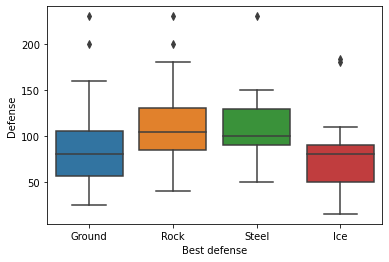

In [27]:
# визуализация
sns.boxplot(x='Best defense', y='Defense', data=best_defense)

Профессор ошибся, выбранные классы покемоно отличаются, что подтверждает статистика.
На графике видно, что из представленных 4х классов медианные значения близки соответственно у Rock и Steel, и у Ground и Ice.